Olá professor, boa noite. Antes de começar a correção, será que o senhor poderia dar uma revisada na minha P1? Tinha falado com o senhor que como fiz em latex algumas figuras "pularam" e alguns itens ficaram em branco e ai o senhor descontou nota, seguem os meus dados abaixo:

NOME: GUSTAVO SOARES GOMES
NUSP:12557438

In [ ]:
#importa bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

##Questão 1a)

In [ ]:
#probabilidades
p = 18/38
q = 20/38
#barreiras absorventes
c = 0
d = 50
#lista dos x
lista_x = [10,20,30,40]

print('PROBABILIDADES EMPIRICAS:')
for x_da_vez in lista_x:
  #ponto inicial
  x0 = x_da_vez
  #armazena os estados de x
  lista = []
  #1000 simulacoes
  for i in range(1000):
    x = x_da_vez
    while x != 50 and x != 0:
      #soma 1 com probabilidade p
      comparador = np.random.uniform()
      if comparador <= p:
        x += 1
      else: x-= 1
    lista.append(x)
  print('P(T_d < T_c) = %f para x = %d'%(lista.count(50)/1000,x_da_vez))

  



PROBABILIDADES EMPIRICAS:
P(T_d < T_c) = 0.009000 para x = 10
P(T_d < T_c) = 0.044000 para x = 20
P(T_d < T_c) = 0.108000 para x = 30
P(T_d < T_c) = 0.337000 para x = 40


In [ ]:
print('PROBABILIDADES PELA FÓRMULA:')
for x in lista_x:
  prob = (1-(q/p)**(x-c))/(1-(q/p)**(d-c))
  print('P(T_d < T_c) = %s para x = %i' %(round(prob,6),x))

PROBABILIDADES PELA FÓRMULA:
P(T_d < T_c) = 0.009677 para x = 10
P(T_d < T_c) = 0.03743 para x = 20
P(T_d < T_c) = 0.117026 para x = 30
P(T_d < T_c) = 0.345304 para x = 40


##Questão 1b)

In [ ]:
#probabilidades
p = 1/2
q = 1/2
#barreiras absorventes
c = 0
d = 50
#lista dos x
lista_x = [10,20,30,40]

#eixo y 
grafy = []

print('PROBABILIDADES EMPIRICAS:')
for x_da_vez in lista_x:
  #ponto inicial
  x0 = x_da_vez
  #armazena os estados de x
  lista = []
  #1000 simulacoes
  for i in range(1000):
    x = x_da_vez
    while x != 50 and x != 0:
      #soma 1 com prob p
      comparador = np.random.uniform()
      if comparador <= p:
        x += 1
      else: x-= 1
    lista.append(x)
  print('P(T_d < T_c) = %f para x = %d'%(lista.count(50)/1000,x_da_vez))
  grafy.append(lista.count(50)/1000)

PROBABILIDADES EMPIRICAS:
P(T_d < T_c) = 0.203000 para x = 10
P(T_d < T_c) = 0.400000 para x = 20
P(T_d < T_c) = 0.603000 para x = 30
P(T_d < T_c) = 0.810000 para x = 40


In [ ]:
#eixo x do gráfico
grafx = [10,20,30,40]

In [ ]:
#estilo seaborn de gráfico
plt.style.use('seaborn')

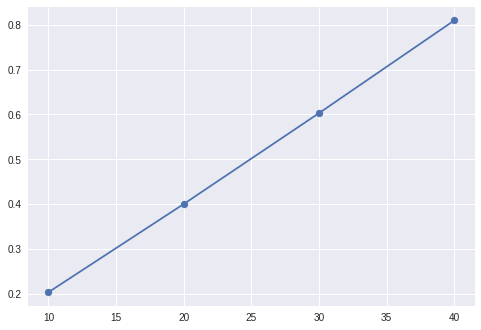

In [ ]:
plt.scatter(grafx,grafy)
plt.plot(grafx,grafy)

In [ ]:
#regressão linear para achar a melhor reta
import statsmodels.api as sm
#transforma em array pra regressão 
grafx = np.array(grafx)
grafy = np.array(grafy)
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(grafx)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(grafy, X_sm).fit()
# mostrando as estatísticas do modelo
display(results.summary())
# mostrando as previsões para o mesmo conjunto passado
#results.predict(X_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.626e+04
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           6.15e-05
Time:                        22:55:25   Log-Likelihood:                 18.274
No. Observations:                   4   AIC:                            -32.55
Df Residuals:                       2   BIC:                            -33.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.004     -0.460      0.691      -0.021       0.017
x1             0.0202      0.000    127.500      0.000       0.020       0.021
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.011
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.646
Skew:                          -0.019   Prob(JB):                        0.724
Kurtosis:                       1.032   Cond. No.                         67.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

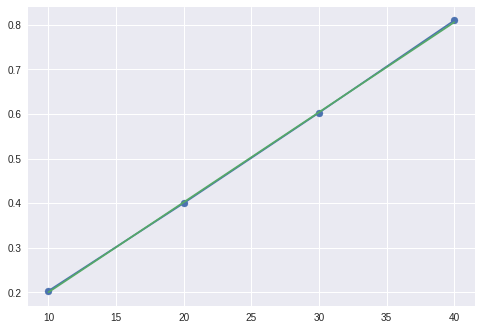

In [ ]:
#grafico anterior
plt.scatter(grafx,grafy)
plt.plot(grafx,grafy)
#plota reta de regressão
x = np.arange(10,40,0.005)
plt.plot(x,0.0202*x -0.00200)

A reta que melhor ajusta os dados é $$f(x) = 0.0202x - 0.002$$

##Questão 2a)

In [ ]:
#dataframe pros quantis
quantis = pd.DataFrame({'n':[10*i for i in range(1,11)]})
quantis['5p'] = [10*i for i in range(1,11)]
quantis['95p'] = [10*i for i in range(1,11)]

#percorre os n do enunciado
for n in range(10,110,10):
  #armazena os ultimos s
  lista_s = []
  chegada = n

  #percorre mil simulacoes
  for i in range(1000):
    t = 0
    n = 0
    s = 0
    N_t = 0

    while n < chegada:
      #se não ultrapassar t n vira o N(t)
      if s <= t: N_t = n
      #incrementos
      n +=1
      t +=1
      s += np.random.exponential(1)
    #appenda ultimo s
    lista_s.append(s)

  a = pd.Series(lista_s)
  #apenda os quantis pedidos
  quantis.loc[n/10-1,'5p'] = a.quantile(0.05)
  quantis.loc[n/10-1,'95p'] = a.quantile(0.95)



In [ ]:
#quantis empiricos
quantis

,n,5p,95p
0,10,5.465856,15.400850
1,20,12.978453,28.079774
2,30,21.841952,39.431617
3,40,29.490156,50.238599
4,50,38.754766,61.655704
5,60,47.935815,73.538848
6,70,57.262881,84.321642
7,80,65.152217,95.579392
8,90,75.618493,106.167975
9,100,84.887194,117.870853


In [ ]:
#colunas pros quantis calculados na normal
quantis['5pnorm'] = [n for n in range(10,110,10)]
quantis['95pnorm'] = [n for n in range(10,110,10)]
#appenda valores
for n in range(10,110,10):
  quantis.loc[n/10 -1,'5pnorm'] =  scipy.stats.norm.ppf(0.05,n,(n**0.5))
  quantis.loc[n/10 -1,'95pnorm'] = scipy.stats.norm.ppf(0.95,n,(n**0.5))

In [ ]:
#comparação quantis empiricos com os calculados na normal
quantis

,n,5p,95p,5pnorm,95pnorm
0,10,5.465856,15.400850,4.798516,15.201484
1,20,12.978453,28.079774,12.643991,27.356009
2,30,21.841952,39.431617,20.990766,39.009234
3,40,29.490156,50.238599,29.597032,50.402968
4,50,38.754766,61.655704,38.369128,61.630872
5,60,47.935815,73.538848,47.259019,72.740981
6,70,57.262881,84.321642,56.238167,83.761833
7,80,65.152217,95.579392,65.287982,94.712018
8,90,75.618493,106.167975,74.395548,105.604452
9,100,84.887194,117.870853,83.551464,116.448536


##Questão 2b)

In [ ]:
#tempo final
T = 100
#lista pros trajetos de s pra cada simulação
S = [[] for i in range(5)]
N = [[] for i in range(5)]

#5simulações
for i in range(5):

  #lista para s,n,t
  lista_s = [0]
  lista_n = [0]
  lista_t = [0]
  lista_N_t = [0]
  n = 0
  s = 0
  t = 0

  #enquanto não chega no 100
  while n < T:

    #se a soma parcial tiver abaixo de T n vira N_t
    if s <= T: N_t = n

    #incrementos
    s += np.random.exponential(1)
    n += 1
    t += 1
    #appenda nas listas 
    lista_t.append(t)
    lista_n.append(n)
    lista_s.append(s)
    lista_N_t.append(N_t)
  #guarda lista dos s em S
  S[i] = lista_s
  N[i] = lista_N_t
 



In [ ]:
plt.style.use('seaborn')

In [ ]:
#função E(N(t)) +- Var(N(t))**0.5
lista_tssup = []
lista_tsinf = []
for t in range(0,101):
  lista_tssup.append(t + 3*t**0.5)
  lista_tsinf.append(t - 3*t**0.5)

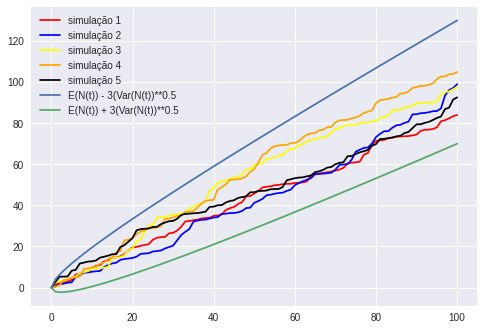

In [ ]:
#plota tudo num mesmo gráfico
colors = ['red','blue','yellow','orange','black']

for i in range(5):
  plt.plot(lista_t,S[i],color = colors[i], label = 'simulação %s'%(i+1))

plt.plot(lista_t,lista_tssup,label = 'E(N(t)) - 3(Var(N(t))**0.5')
plt.plot(lista_t,lista_tsinf,label = 'E(N(t)) + 3(Var(N(t))**0.5')
plt.legend()
plt.show()